# Display selected non-matched sources

Extract corresponding image sections around selected entries in the table of non-matching sources. Display them side-by-side. 

Image files are retrieved from the APPLAUSE database via plate_id:

```
SELECT DISTINCT s.filename_scan
FROM applause_dr4.plate AS p
LEFT JOIN applause_dr4.scan AS s USING (plate_id)
WHERE s.filename_scan IS NOT NULL
AND p.plate_id = 19012
```

In [1]:
import warnings

from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.utils.exceptions import AstropyWarning

from library import plot_images
from settings import get_parameters, current_dataset, fname

In [2]:
warnings.simplefilter('ignore', category=AstropyWarning)

In [3]:
par = get_parameters(current_dataset)
par

{'nproc': 8,
 'sextractor_flags': 4,
 'model_prediction': 0.8,
 'max_flux_threshold': 0.3,
 'elongation': 1.5,
 'annular_bin': 4,
 'flag_rim': 0,
 'nbrighter': 150000,
 'sampling_step': 10,
 'min_acceptable_flux': 25000,
 'min_fwhm': 5.0,
 'max_fwhm': 7.5,
 'qfit_max': 5.0,
 'cfit_max': 5.0,
 'invert_east': [False, False],
 'invert_north': [False, False],
 'table1': 'sources_9319.csv',
 'table2': 'sources_9320.csv',
 'table1_calib': 'sources_calib_9319.csv',
 'table2_calib': 'sources_calib_9320.csv',
 'table_matched': 'table_match_9319_9320.fits',
 'table_non_matched': 'table_nomatch_9319_9320.fits',
 'table_psf_nonmatched': 'table_psf_nomatch_9319_9320.fits',
 'image1': 'GS00768_x.fits',
 'image2': 'GS00769_x.fits'}

In [4]:
table = Table.read(fname(par['table_psf_nonmatched']), format='fits')
table.sort('flux_max', reverse=True)
table

source_id,process_id_1,scan_id_1,plate_id_1,archive_id_1,solution_num,annular_bin_1,dist_center_1,dist_edge_1,sextractor_flags_1,model_prediction_1,ra_icrs,dec_icrs,ra_error,dec_error,gal_lon,gal_lat,ecl_lon,ecl_lat,x_sphere,y_sphere,z_sphere,healpix256,healpix1024,nn_dist,zenith_angle,airmass,natmag,natmag_error,bpmag,bpmag_error,rpmag,rpmag_error,natmag_plate,natmag_correction,natmag_residual,phot_range_flags,phot_calib_flags,color_term,cat_natmag,match_radius,gaiaedr3_id,gaiaedr3_gmag,gaiaedr3_bp_rp,gaiaedr3_dist,gaiaedr3_neighbors,timestamp_insert_1,timestamp_update_1,pos,process_id_2,scan_id_2,plate_id_2,archive_id_2,source_num,x_source,y_source,a_source,b_source,theta_source,erra_source,errb_source,errtheta_source,elongation,x_peak,y_peak,flag_usepsf,x_image,y_image,erra_image,errb_image,errtheta_image,x_psf,y_psf,erra_psf,errb_psf,errtheta_psf,mag_auto,magerr_auto,flux_auto,fluxerr_auto,mag_iso,magerr_iso,flux_iso,fluxerr_iso,flux_max,flux_radius,isoarea,sqrt_isoarea,background,sextractor_flags_2,dist_center_2,dist_edge_2,annular_bin_2,flag_rim,flag_negradius,flag_clean,model_prediction_2,timestamp_insert_2,timestamp_update_2,id,group_id,group_size,local_bkg,x_init,y_init,flux_init,fwhm_init,x_fit,y_fit,flux_fit,fwhm_fit,x_err,y_err,flux_err,fwhm_err,npixfit,qfit,cfit,flags
int64,int64,int64,int64,int64,int64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,bytes10,bytes10,bytes10,bytes10,bytes10,bytes10,float64,bytes15,bytes15,int64,int64,bytes9,bytes10,float64,bytes19,bytes4,bytes10,bytes12,int64,bytes29,bytes29,bytes42,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,bytes4,bytes4,bytes4,bytes4,bytes4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,int64,int64,int64,int64,float64,bytes29,bytes29,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64
40349380007658,34938,12209,9319,102,0,4,3248.3171,1061.8263,0,1.0,359.56717331456775,55.8796625754929,0.0968428,0.0834128,115.47776054780692,-6.220664977358579,30.123211279747515,49.57720175628767,0.5609168781911741,-0.004237387353368797,0.8278612808367626,226773,3628378,16.215902,17.767914,1.0499196,NULL,NULL,NULL,NULL,NULL,NULL,0.0,NULL,NULL,0,0,NULL,NULL,0.0,NULL,NULL,NULL,NULL,0,2022-06-13 20:53:25.680547+00,2022-06-13 20:53:25.680547+00,"(6.2756310564283 , 0.975284096845806)",34938,12209,9319,102,7658,5086.6753,1061.8238552112286,2.3742547,2.2668324,-49.867508,0.022372551,0.021500487,-72.44109,1.0473888,5087,1062,0,5086.6753,1061.8263,0.022372551,0.021500487,-72.44109,NULL,NULL,NULL,NULL,NULL,9.33182,0.011810238,1850428.6,20123.39,9.302416,0.007824958,1901226.4,13698.91,38214.902,2.9795022,89,9.433981,2401.1907,0,3248.3171,1061.8263,4,0,0,1,1.0,2022-06-13 05:05:13.513042+00,2022-06-13 05:05:13.513042+00,23,23,1,0.0,5086.6753,1061.8238552112286,767402.0,6.0,5085.714813397793,1060.7941446180912,1968451.3567549216,6.095988620201128,0.04570986150201917,0.045249058000968435,34180.92995100392,0.07607204918336294,961,1.038378099585041,-0.0009020770638366653,0
40349380023437,34938,12209,9319,102,1,2,2134.7046,2713.4817,3,0.84770274,359.9745366655085,56.2933926013567,0.0968428,0.0834128,115.78588995844324,-5.8615869181227716,30.79318818622393,49.763889016463224,0.5549403106216618,-0.00024662604824610113,0.8318901314613161,226781,3628503,10.50624,17.505064,1.0483947,15.790279,0.40083534,15.612591,0.4008491,14.61331,0.4008491,16.06605,-0.27577046,NULL,0,0,1.1778167,NULL,0.6390662,1994790796065234944,NULL,0.999281,0.55794203,2,2022-06-13 20:53:25.680547+00,2022-06-13 20:53:25.680547+00,"(6.28274088815417 , 0.98250504801149)",34938,12209,9319,102,23437,4210.2427,2713.957459753294,2.408173,2.280

(132, 132)
(132, 132)


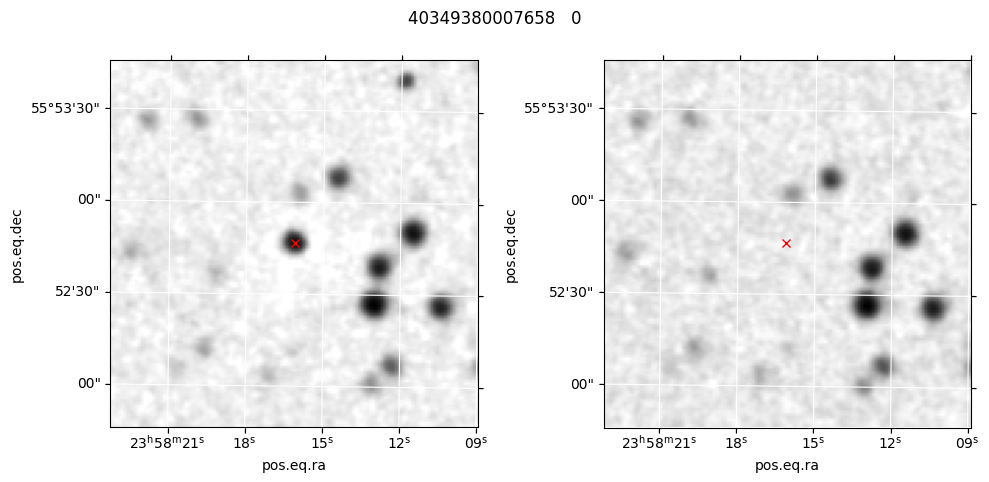

In [7]:
size = 2./60. * u.deg  # full side of square

# for row_index in range(len(table)):
for row_index in range(1):

    ra  = (table['ra_icrs'][row_index])
    dec = (table['dec_icrs'][row_index])
    
    title = str(table['source_id'][row_index]) + "   " + str(row_index)

    target_coords = SkyCoord(ra=ra, dec=dec, unit='deg')
    
    plot_images(fname(par['image1']), fname(par['image2']), target_coords, size, title, 
                invert_east=par['invert_east'], invert_north=par['invert_north'])